In [0]:
from fastai.vision import *

In [0]:
path = Path('data/cups')
dest = path/'plastic'
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(Path('../input/urls_plastic.txt'), dest, max_pics = 400)

In [0]:
dest = path/'paper'
dest.mkdir(parents=True, exist_ok=True)
download_images(Path('../input/urls_paper.txt'), dest, max_pics = 400)

In [0]:
verify_images(path/'plastic', delete=True, max_size=500)
verify_images(path/'paper', delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=64, num_workers=0).normalize(imagenet_stats)

In [0]:
data.classes

['paper', 'plastic']

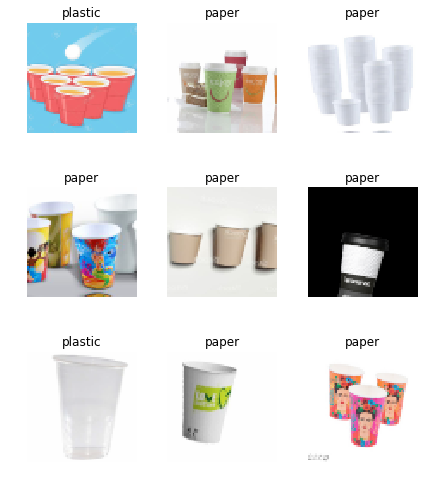

In [0]:
data.show_batch(rows=3, figsize=(6,7))

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 113MB/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.076217,1.217578,0.384058,00:07
1,0.957310,1.236052,0.311594,00:05
2,0.880794,1.124699,0.326087,00:05
3,0.851894,1.032729,0.318841,00:05


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


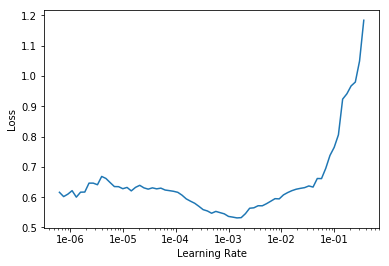

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5,max_lr=2e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.603843,1.022794,0.311594,00:05
1,0.558009,1.073902,0.362319,00:05
2,0.463715,1.111955,0.282609,00:05
3,0.409099,0.978170,0.282609,00:05
4,0.355032,0.965636,0.275362,00:05


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (555 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
plastic,plastic,plastic,plastic,plastic
Path: data/cups;

Valid: LabelList (138 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
paper,paper,plastic,plastic,plastic
Path: data/cups;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

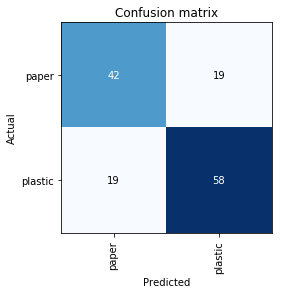

In [0]:
interp.plot_confusion_matrix()

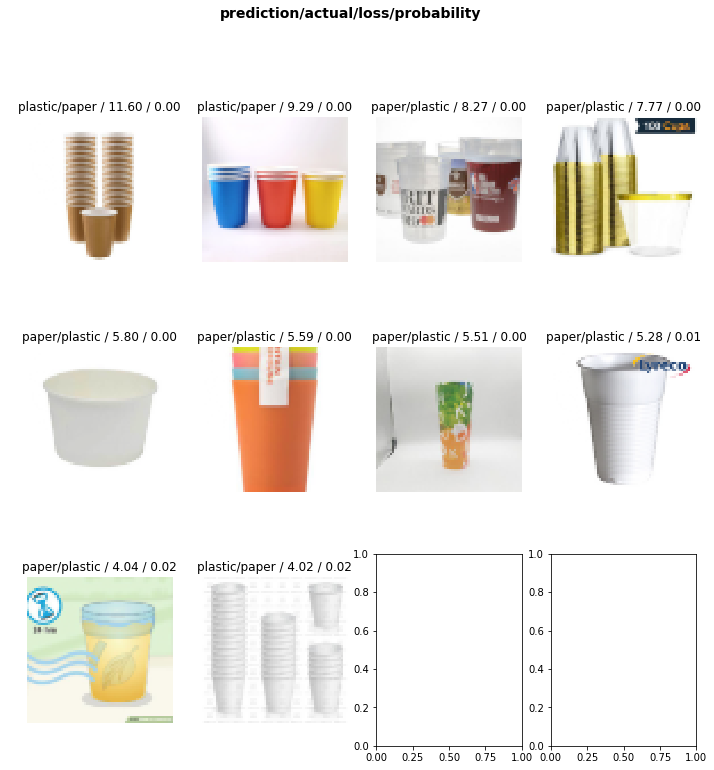

In [0]:
interp.plot_top_losses(10)

In [0]:
from fastai.widgets import *

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, n_imgs=100)